# Drew Warren
# Deep learning from scratch: homework 1

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 2. </span>  Use gradient descent to minimize a simple function, and tune your steplength by analyzing the cost function plot

Copy the gradient descent code given in [Section 6.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/6_First_order_methods/6_4_Gradient_descent.html) into the cell below.

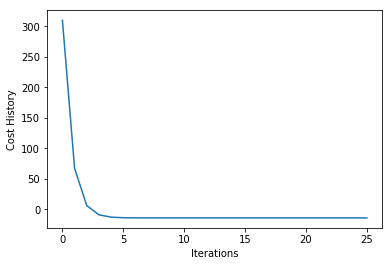

In [49]:
#### GRADIENT DESCENT CODE GOES HERE ####
#### Gradient Descent function from section 6.4
def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)
    weight_history = []
    cost_history = []
    alpha = 0
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        w = w - alpha*grad_eval
        
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

g = lambda w: w**2 + 16*w + 50
w = 10.0; alpha_choice = .25; max_its = 25;
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)
#print(weight_history)

#### Plotting
fig = plt.figure()
plt.plot(range(max_its+1), cost_history)
plt.ylabel('Cost History')
plt.xlabel('Iterations')
plt.show()


Next run gradient descent to minimize the following function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

with an initial point $w_0 = 2$ and $1000$ iterations.  Run gradient descent 3 times with 3 different choices: $\alpha = 1$, $\alpha = 10^{-1}$, $\alpha = 10^{-2}$.

Plot the resulting `cost_history` of each run in a single plot to compare their performance.  Which steplength value works best for this particular function and initial point?

In [51]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   

In [52]:
# RUN GRADIENT DESCENT TO MINIMIZE THIS FUNCTION
w = 2.0
max_its = 1000
alpha_choice = [1.0,.1,.01]
weight_history = [0,0,0]
cost_history = [0,0,0]

for i,alpha in enumerate(alpha_choice):
    weight_history[i],cost_history[i] = gradient_descent(g,alpha,max_its,w)


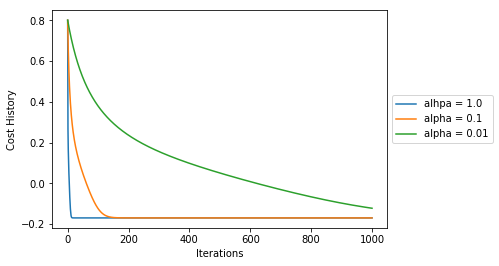

In [54]:
# COST FUNCTION HISTORY PLOTTER GOES HERE
#### Plotting
fig = plt.figure()
plt.plot(range(max_its+1), cost_history[0])
plt.plot(range(max_its+1), cost_history[1])
plt.plot(range(max_its+1), cost_history[2])
plt.ylabel('Cost History')
plt.xlabel('Iterations')
plt.legend(['alhpa = 1.0','alpha = 0.1','alpha = 0.01'],loc='center left',bbox_to_anchor=(1,0.5))
plt.show()
